In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,LabelEncoder
import missingno as ms


In [2]:
## imorting the data 
debit_data = pd.read_csv(r'D:/datasets/CC GENERAL.csv')
debit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
debit_data.drop(["CUST_ID"],axis = 1,inplace = True)


In [4]:
# percentages of the null values
debit_data.isnull().sum()*100/len(debit_data)

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

<AxesSubplot:>

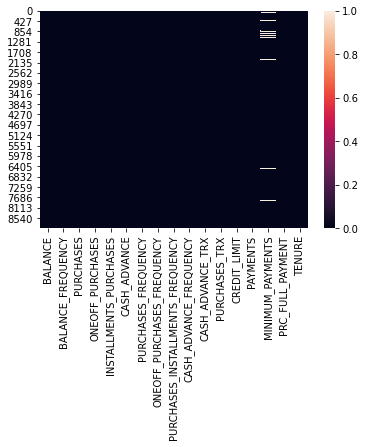

In [5]:
sns.heatmap(debit_data.isnull())

In [6]:
debit_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
debit_data["CREDIT_LIMIT"]=debit_data['CREDIT_LIMIT'].fillna(debit_data['CREDIT_LIMIT'].mean(),axis=0)
debit_data["MINIMUM_PAYMENTS"]=debit_data['MINIMUM_PAYMENTS'].fillna(debit_data['MINIMUM_PAYMENTS'].mean(),axis=0)

In [8]:
debit_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

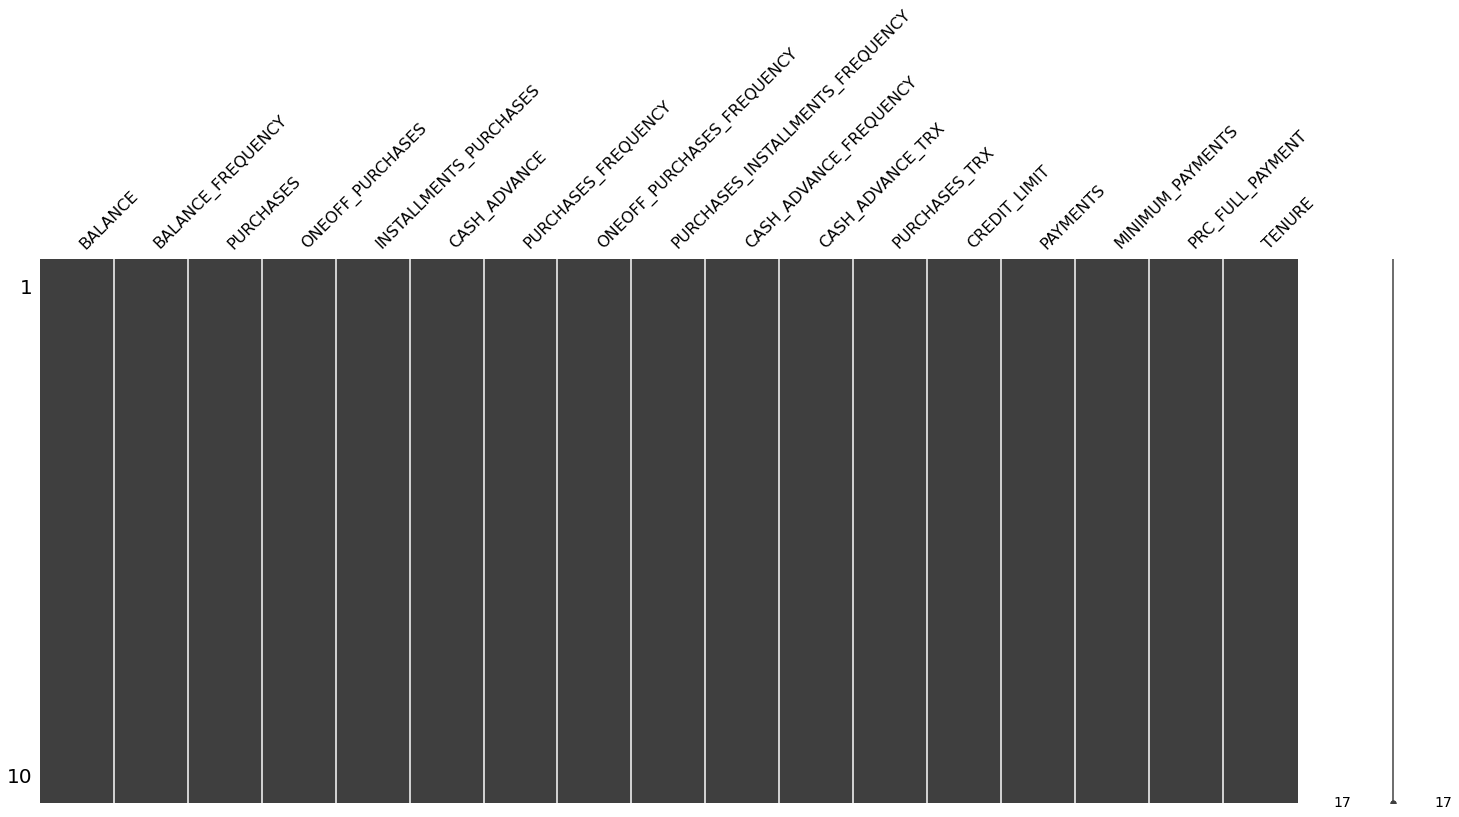

In [9]:
corr1 = debit_data.corr()
most= corr1.nlargest(10,'BALANCE_FREQUENCY' )
most
ms.matrix(most)

<AxesSubplot:>

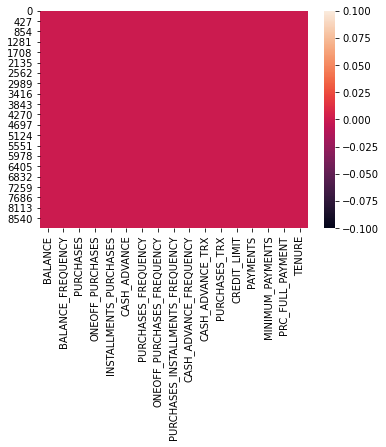

In [10]:
sns.heatmap(debit_data.isnull())

In [11]:
debit_data["MINIMUM_PAYMENTS"].quantile(.95)

2719.5669347999956

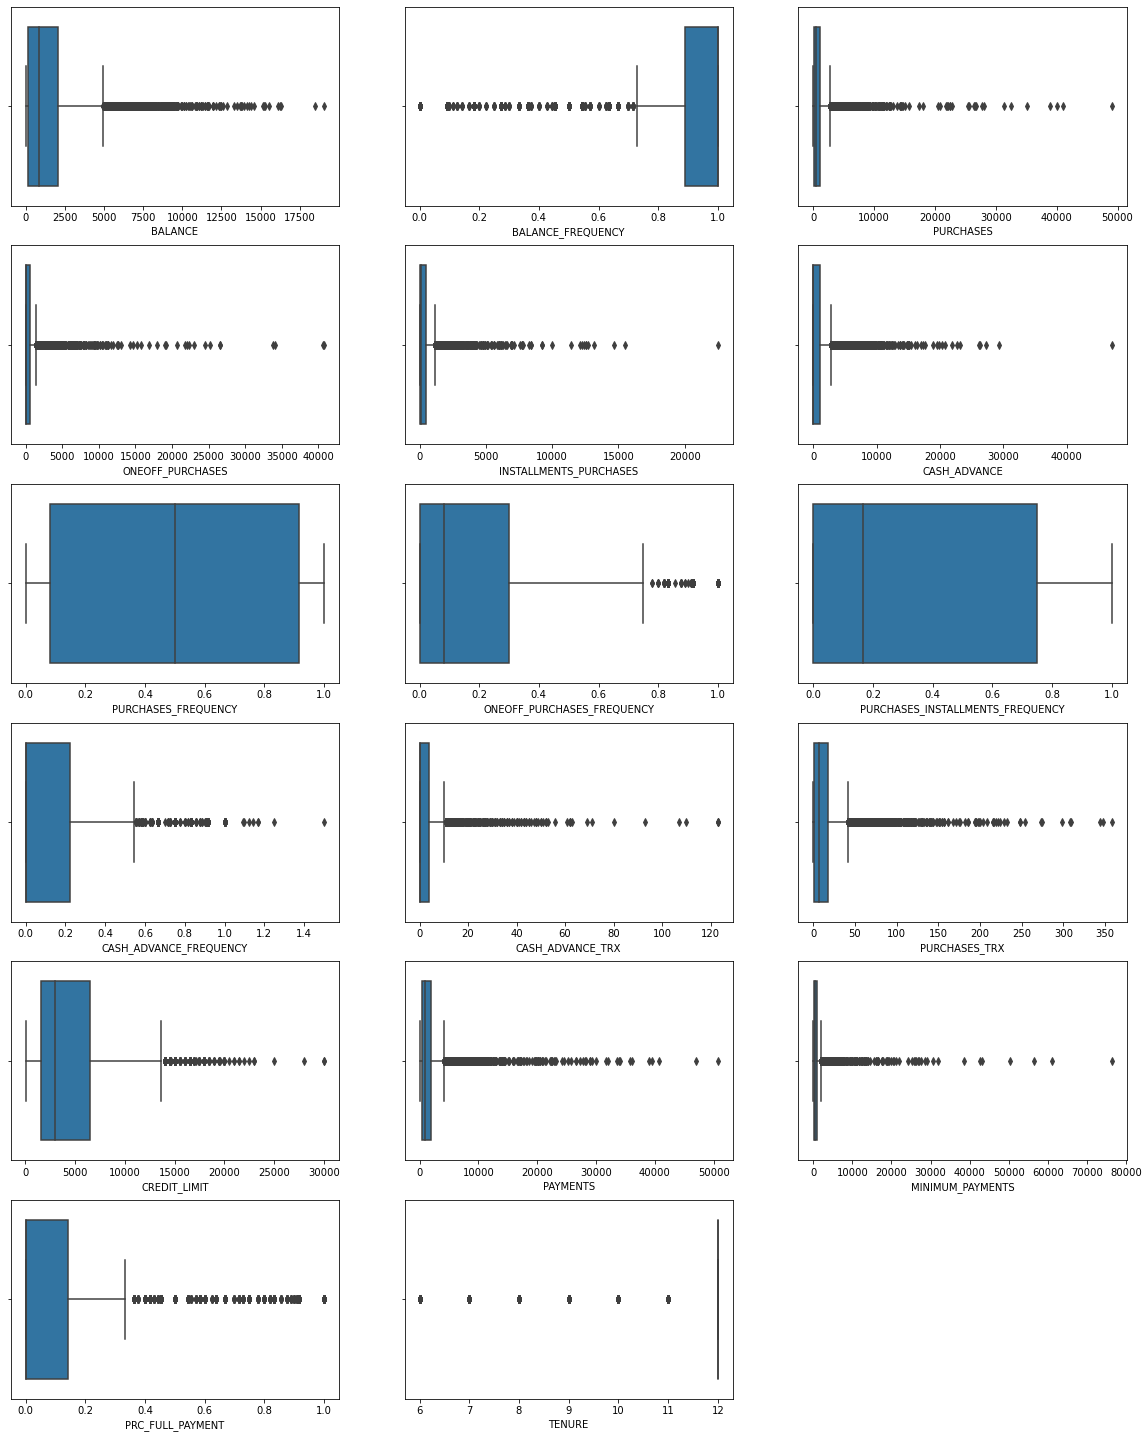

In [12]:
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(debit_data.columns):
    axes = fig.add_subplot(7, 3, i+1)
    sns.boxplot(x = debit_data[v], ax = axes)

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

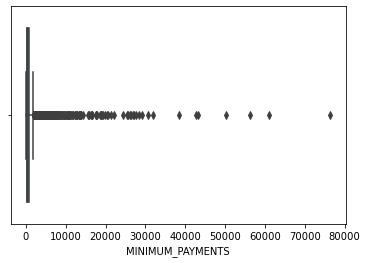

In [13]:
sns.boxplot(x = debit_data["MINIMUM_PAYMENTS"])

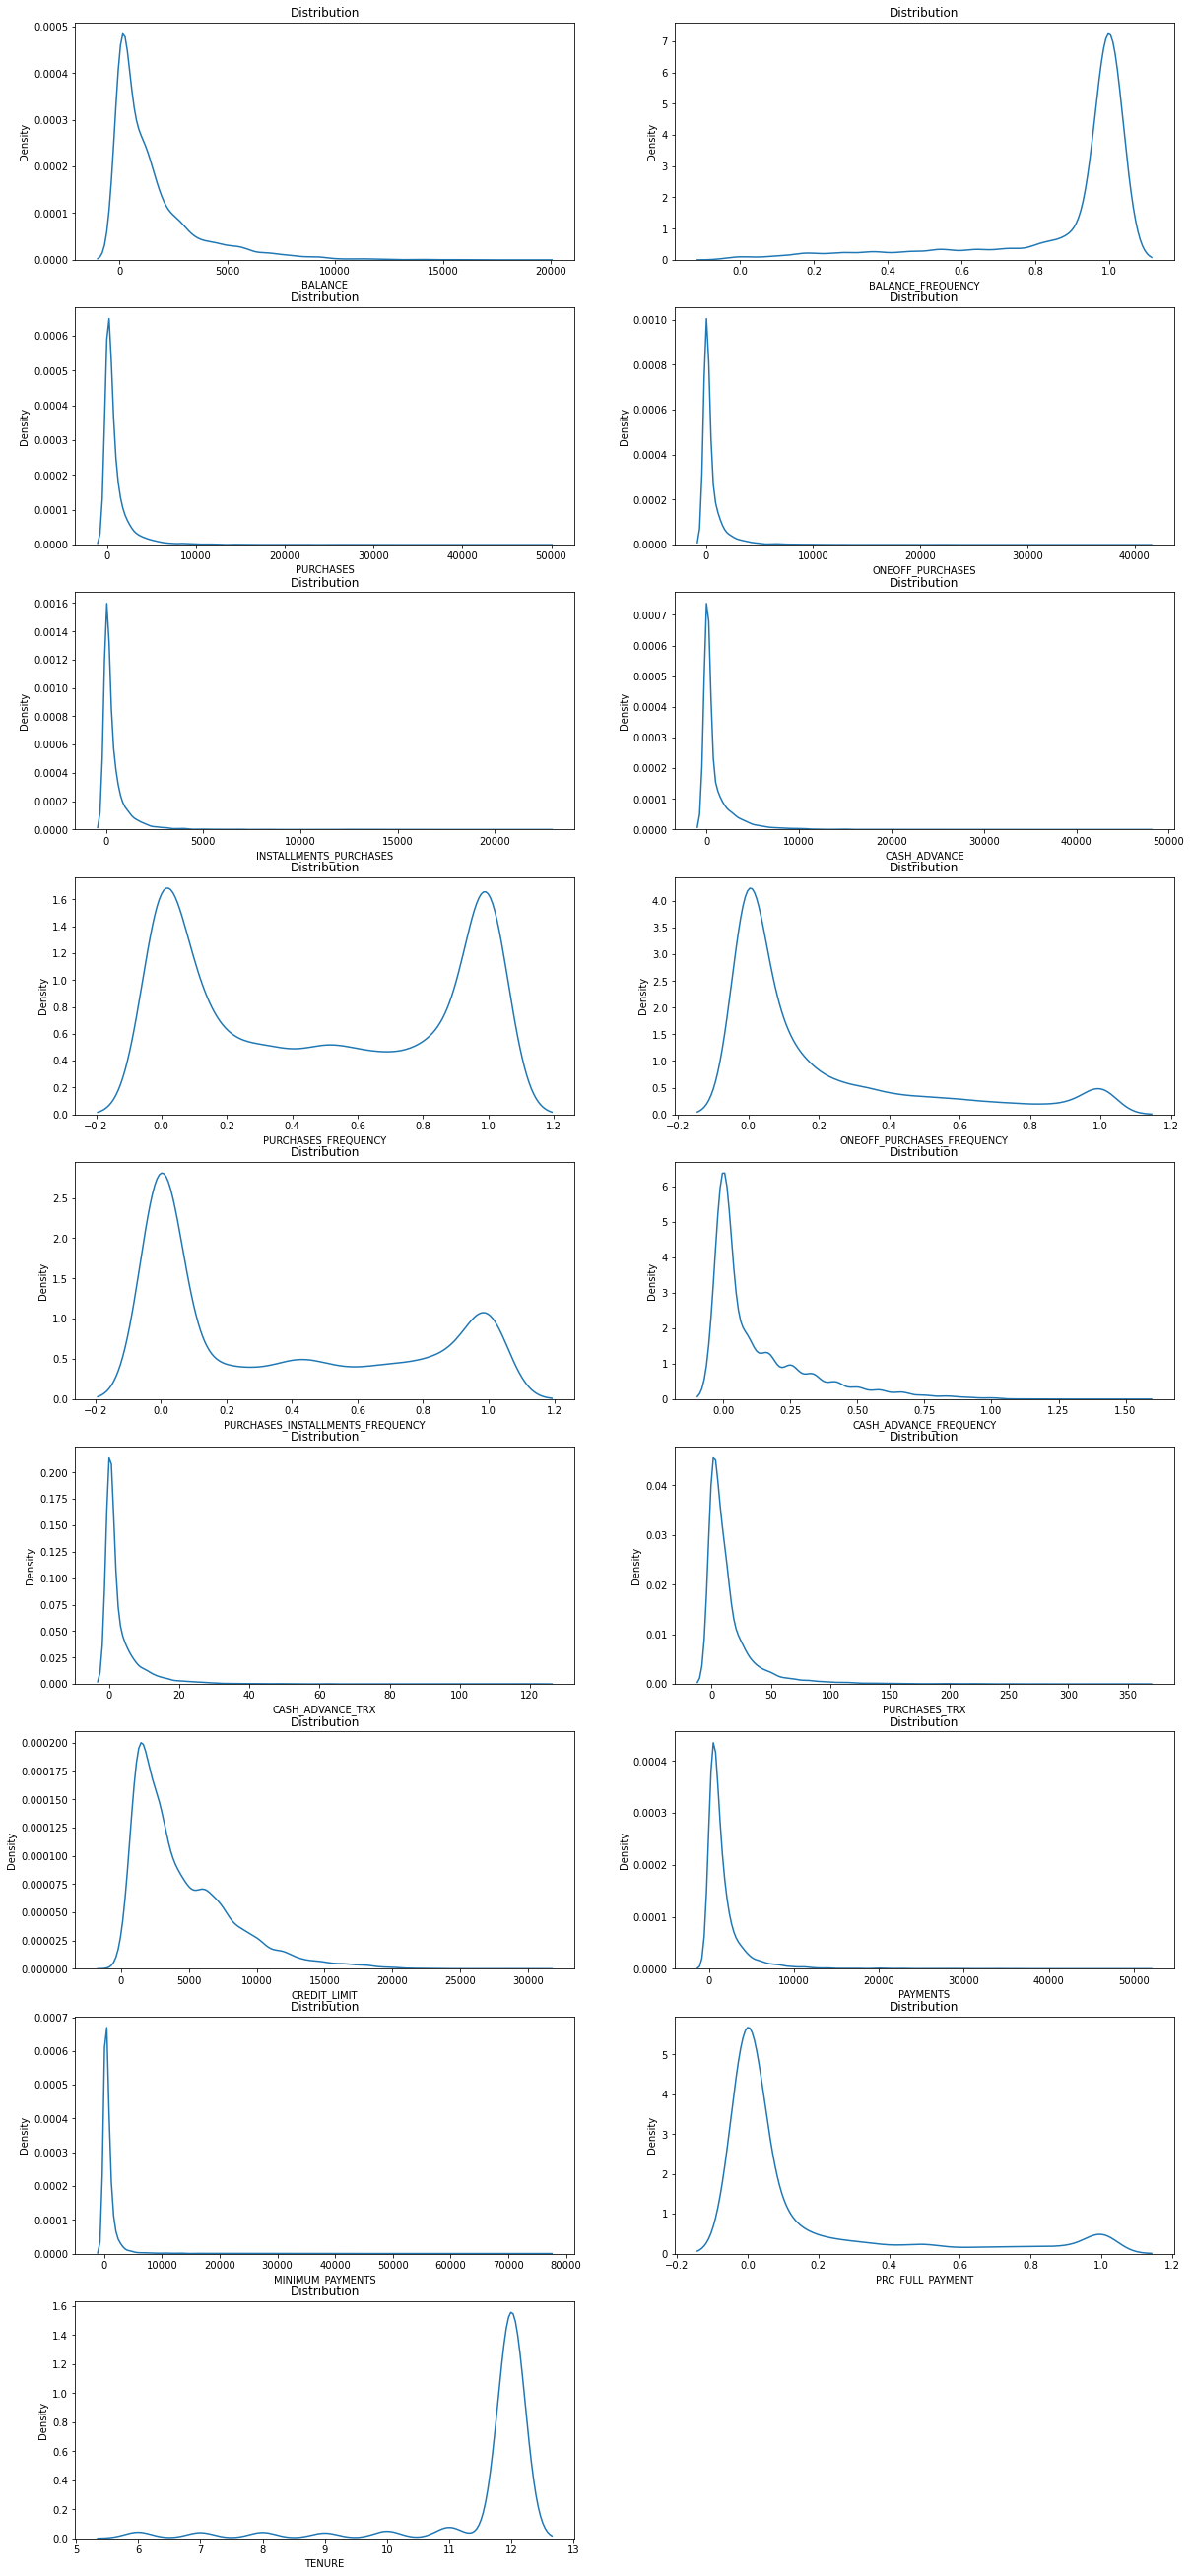

In [14]:
plt.figure(figsize=(20,47))
for i, col in enumerate(debit_data.columns):
    if debit_data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(debit_data[col], ax=ax)
        plt.xlabel(col)
        plt.title("Distribution")
        
plt.show()

In [15]:
debit_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# outlier after the Logarithmic

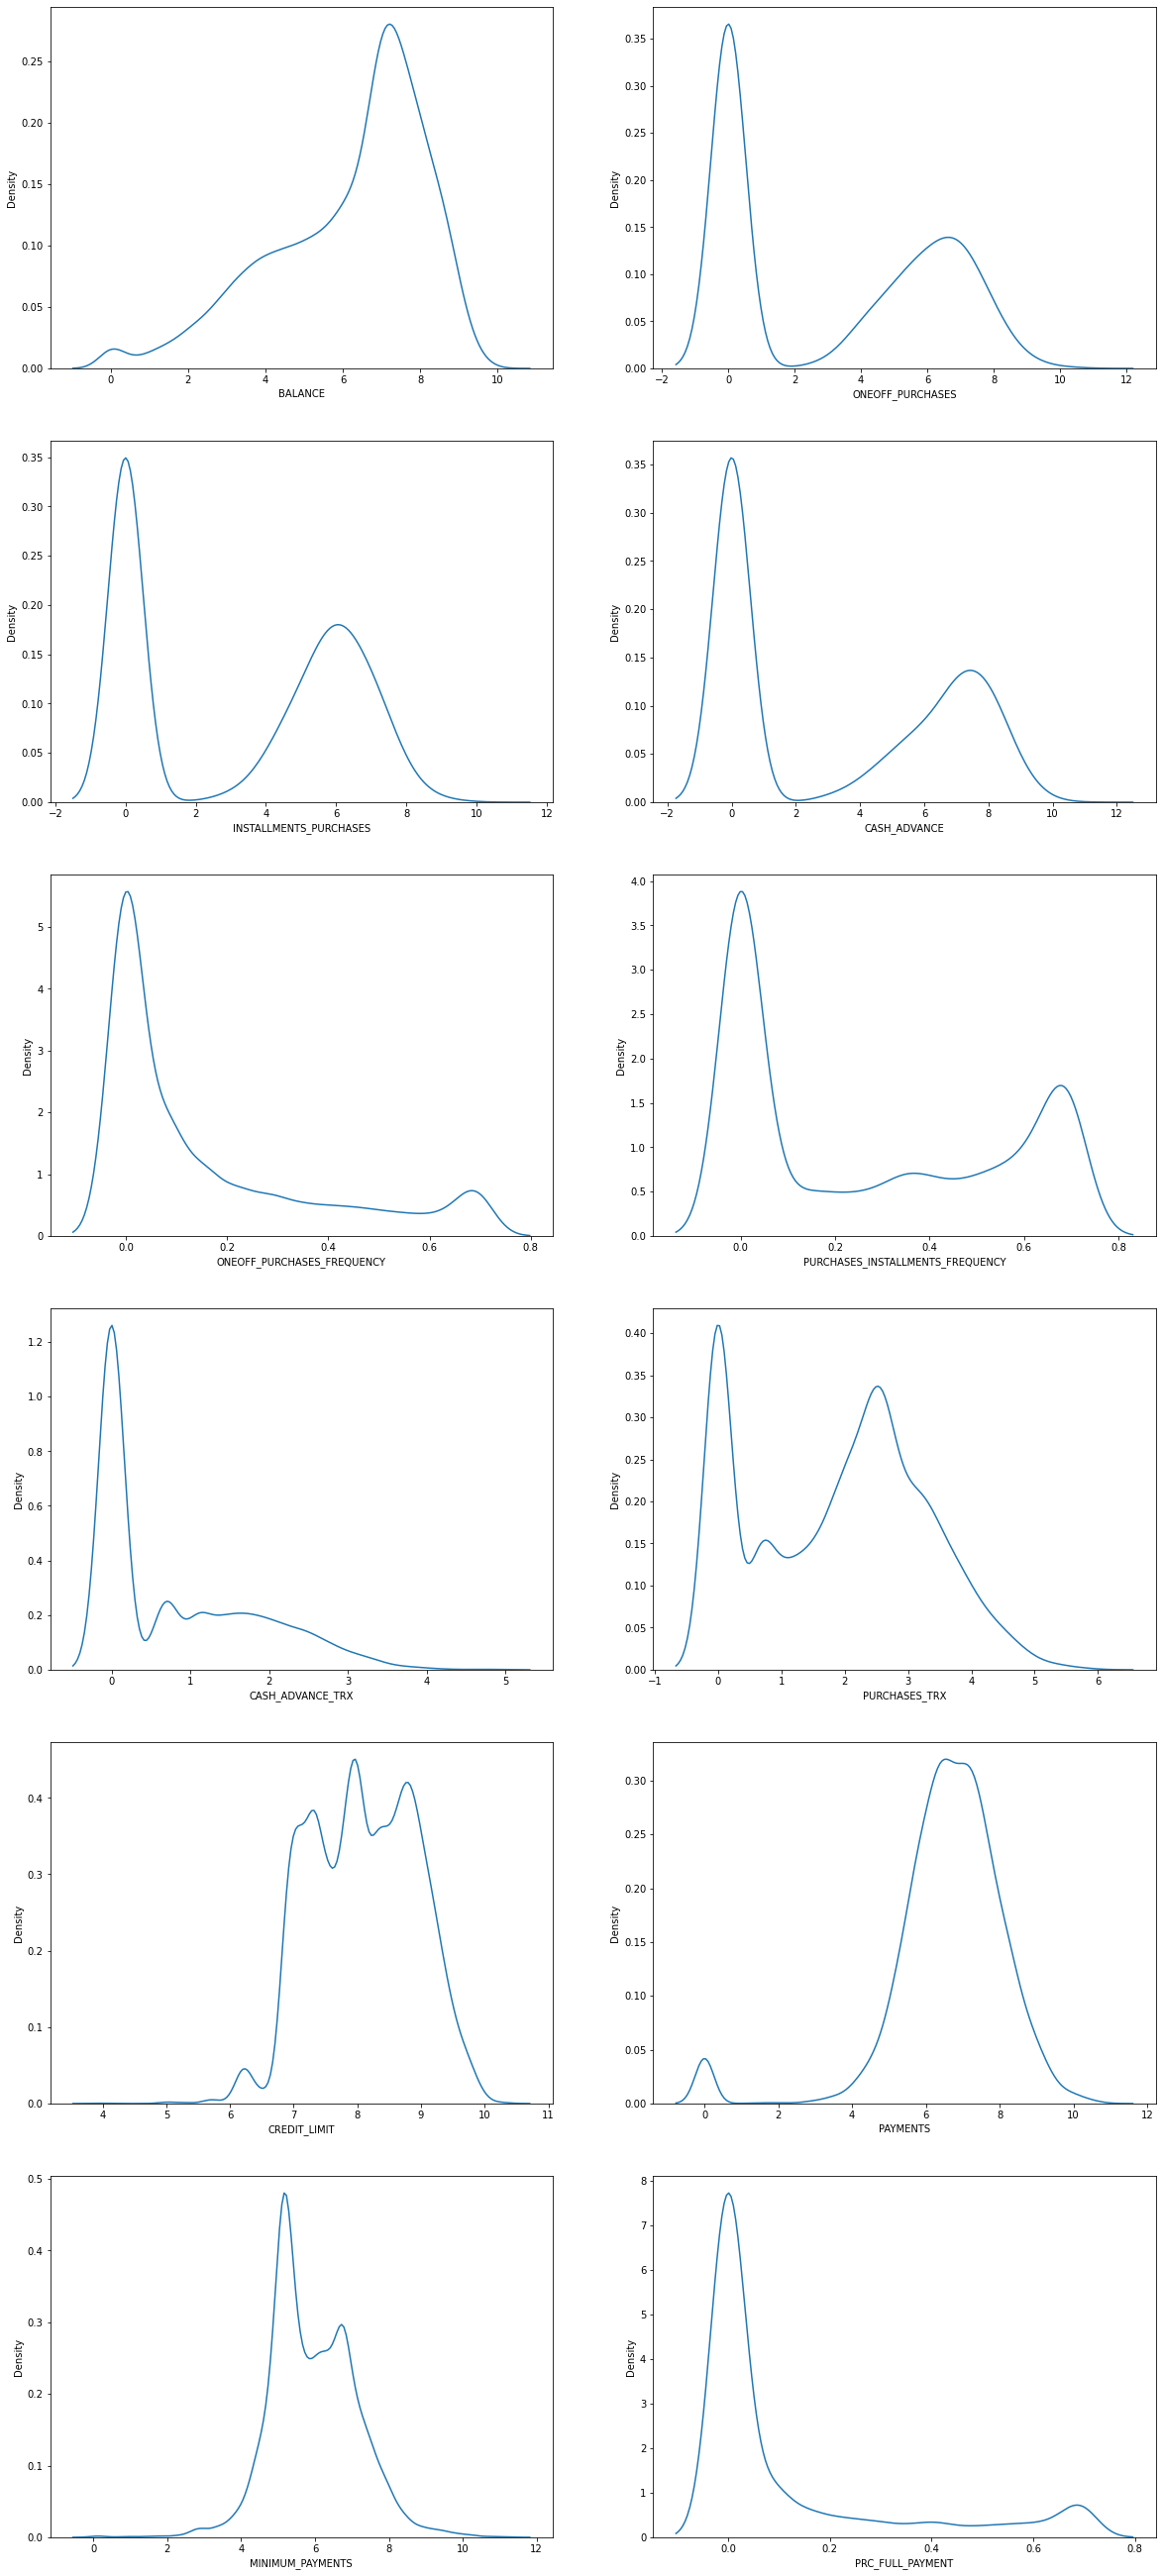

In [16]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']




for col in cols:
    debit_data[col]=np.log(1 + debit_data[col])
    
plt.figure(figsize=(20,47))

for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(debit_data[col], ax=ax)
plt.show()
        
  


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

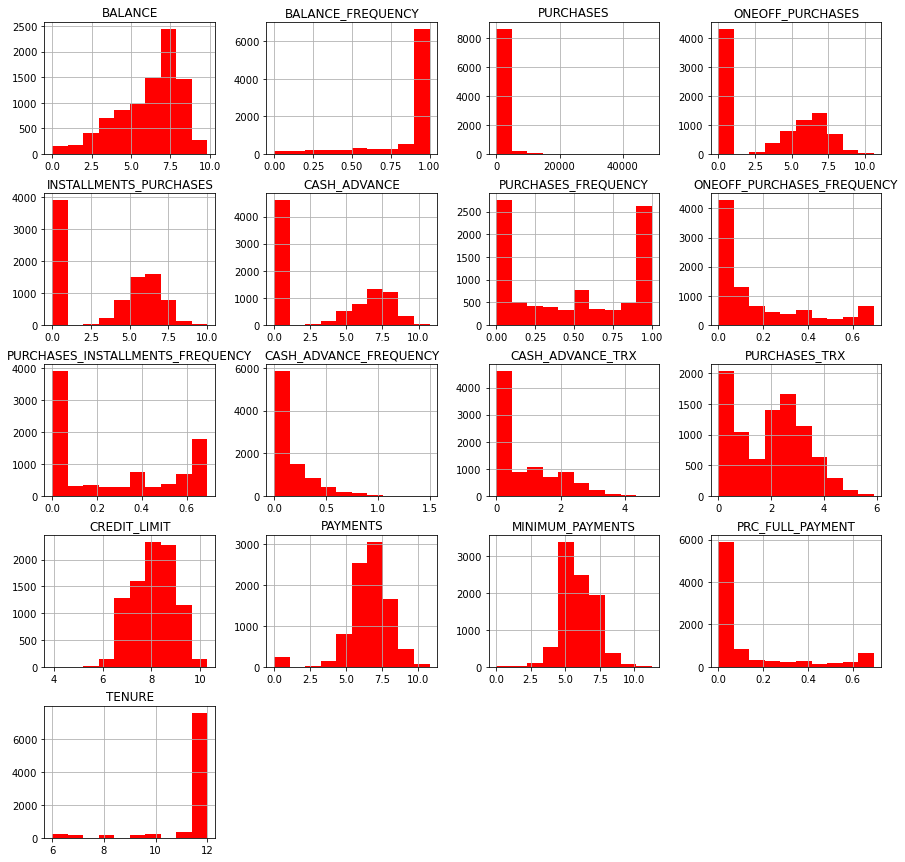

In [17]:
debit_data.hist(bins=10,figsize=(15,15),color = "red")

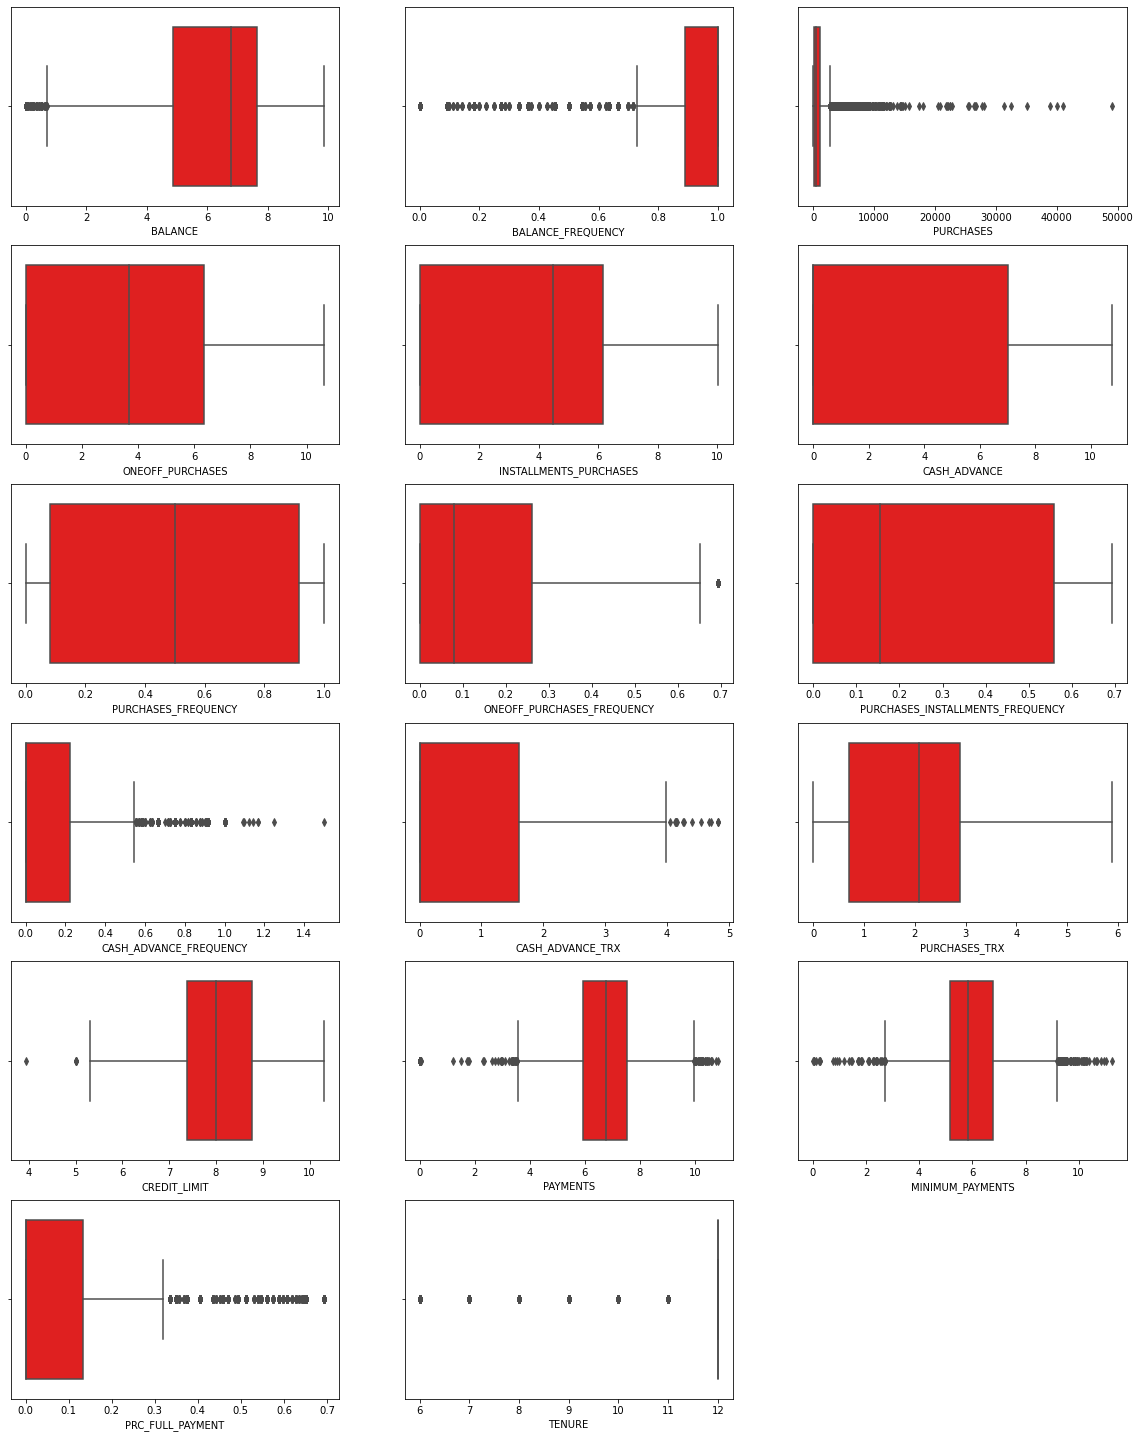

In [18]:


fig = plt.figure(figsize = (20,30))

for i, v in enumerate(debit_data.columns):
    axes = fig.add_subplot(7, 3, i+1)
    sns.boxplot(x = debit_data[v], ax = axes,color='red')

In [19]:
debit_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [20]:
# remove the outlier
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(debit_data.PURCHASES)




In [21]:
debit_data.drop(debit_data[(debit_data.PURCHASES>upperbound )| (debit_data.PURCHASES<lowerbound)].index,inplace=True)

In [22]:
lowerbound,upperbound = outlier_treatment(debit_data.BALANCE)
debit_data.drop(debit_data[(debit_data.BALANCE>upperbound )|(debit_data.BALANCE<lowerbound)].index,inplace=True)


In [24]:
lowerbound,upperbound = outlier_treatment(debit_data.MINIMUM_PAYMENTS)
debit_data.drop(debit_data[(debit_data.MINIMUM_PAYMENTS>upperbound )|(debit_data.MINIMUM_PAYMENTS<lowerbound)].index,inplace=True)



In [26]:
debit_data.shape

(7950, 17)

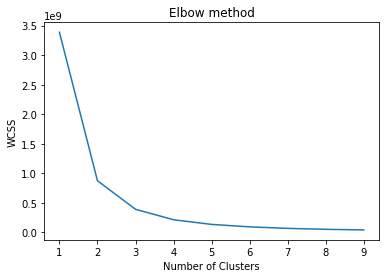

In [27]:
from sklearn.cluster import KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(debit_data) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
cluster = KMeans(n_clusters=2,random_state=0)
cluster.fit(debit_data)

KMeans(n_clusters=2, random_state=0)

In [29]:
debit_data["balance_credit"] = cluster.labels_

In [30]:
debit_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,balance_credit
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,0
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12,0
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,0
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,1
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,1.000000,291.12,0.000000,5.677165,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,6,0
8946,3.004851,1.000000,300.00,0.000000,5.707110,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,6.762968,0.000000,6,0
8947,3.194529,0.833333,144.40,0.000000,4.979489,0.000000,0.833333,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,6,0
8948,2.671218,0.833333,0.00,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,6,0


In [32]:
debit_data["balance_credit"] = debit_data["balance_credit"].replace({1:"frequently updated",0:"not frequently updated"})

<AxesSubplot:xlabel='PURCHASES', ylabel='MINIMUM_PAYMENTS'>

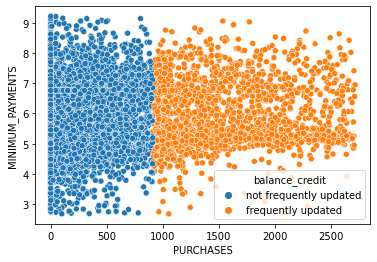

In [33]:
sns.scatterplot(x = debit_data["PURCHASES"],y = debit_data["MINIMUM_PAYMENTS"],hue=debit_data['balance_credit'])